# 대구 문화생활 알아보기

2020년 대구 문화체육시설 관련 통계 자료와 대구 시민의 여가활동 데이터를 바탕으로 대구에서의 문화생활 만족도를 알아보고자 한다


**공공데이터 출처**
- [대구 D데이터허브](https://data.daegu.go.kr)
- [국가통계포털](https://kosis.kr)


**참고사항**
- 일반적으로 말하는 문화생활, 여가생활보다 지역의 문화시설에 대한 분석 자료
- 2020년으로 되어있으나 2021년 11월까지의 데이터가 반영된 통계 자료
- 성별, 연령 등 세부 그룹별 분석이 아닌 대구시 전체를 기준으로 분석
- 한글 인식 오류로 인해 font 파일 및 경로 별도 지정
- utf-8 encoding 오류로 인해 cp949로 인코딩
- 인코딩 오류 참조 : [UnicodeDecodeError] 'utf-8' codec can't decode byte 0xb1 in position 1: invalid start byte

## contents

1. packages
2. data preset
3. data cleansing
4. data visualization
5. conclude

## packages

- os to get a directory list
- pandas for data analysis
- numpy for missing value/NaN/nan
- matplotlib.pyplot for data graph
- matplotlib.font_manager for encoding korean language

In [98]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

font_path = './font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

## data preset

6개의 csv file을 'csv_collect' list에 담기

In [ ]:
file_list = os.listdir('./data/daegu/')
os.chdir('./data/daegu/')
csv_collect = []
for file in file_list:
    if not 'xlsx' in file:
        csv_collect.append(pd.read_csv(file, encoding='cp949'))

## data cleansing

- 평일, 토요일, 일요일, 1주 통계
- 주말, 휴일 여가활동 유형과 가장 많이 하는 활동 순위
- 대구 문화체육시설 종류, 이용률, 만족도, 이용빈도
- 여가활동 만족도와 불만족 이유

## data visualizaiton

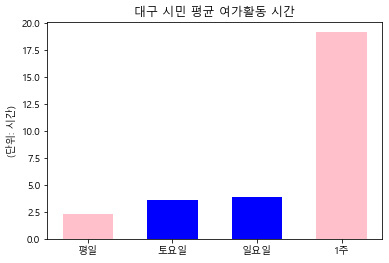

In [20]:
plt.bar(avg20.index, avg20, color=['pink', 'b', 'b', 'pink'], width=0.6)
plt.title('대구 시민 평균 여가활동 시간')
plt.ylabel('(단위: 시간)')
plt.show()

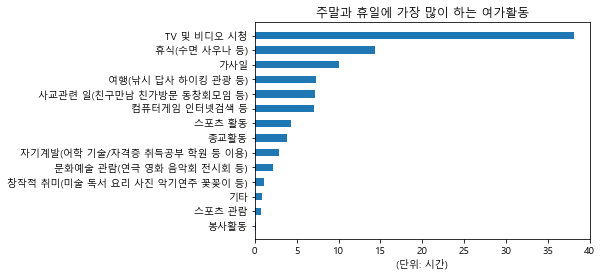

In [21]:
index = np.arange(len(activity_r.index))
plt.barh(y=index, width=activity_r['비율(단위: %)'], height=0.5)
plt.title('주말과 휴일에 가장 많이 하는 여가활동')
plt.xlabel('(단위: 시간)')
plt.yticks(index, activity_r.index)
plt.show()

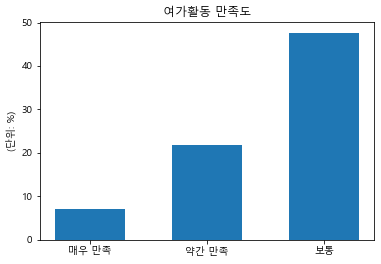

In [22]:
plt.bar(survey20.iloc[0, :3], survey20.iloc[1, :3], width=0.6)
plt.title('여가활동 만족도')
plt.ylabel('(단위: %)')
plt.show()

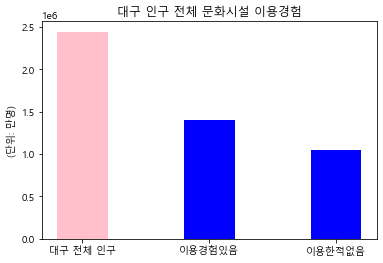

In [23]:
plt.bar(['대구 전체 인구', '이용경험있음', '이용한적없음'], [rdf.iloc[0, 0], rdf.iloc[0, 0]*0.573, rdf.iloc[0, 0]*0.427], color=['pink', 'b', 'b'], width=0.4)
plt.title('대구 인구 전체 문화시설 이용경험')
plt.ylabel('(단위: 만명)')
plt.show()

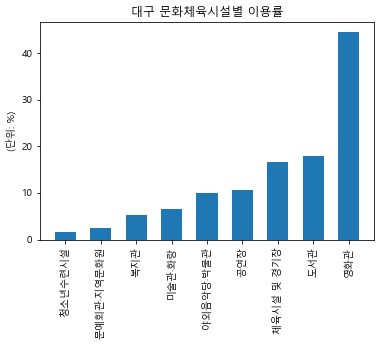

In [24]:
plt.bar(r20tb['문화체육시설'], r20tb['이용률(복수응답)'], width=0.6)
plt.title('대구 문화체육시설별 이용률')
plt.ylabel('(단위: %)')
plt.xticks(rotation='vertical')
plt.show()

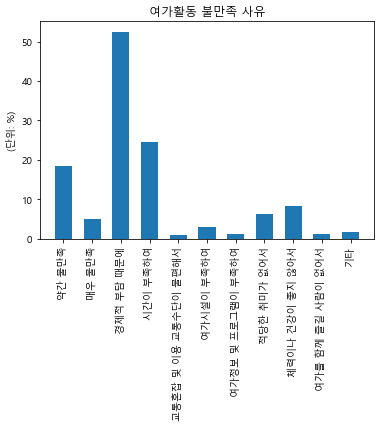

In [25]:
plt.bar(survey20.iloc[0, 3:], survey20.iloc[1, 3:], width=0.6)
plt.title('여가활동 불만족 사유')
plt.ylabel('(단위: %)')
plt.xticks(rotation='vertical')
plt.show()

## conclude

서울의 문화시설 및 문화생활 환경에 비해 대구에서 할만한 것이나 놀 수 있는 곳이 많지 않다는 점에서 시작했다.

문화시설 이용률은 영화관에 집중되어 있고 나머지는 그다지 다양하지 못하며 여가활동 불만족 사유는 지역의 문화시설과는 관련이 없다.

보통 지역의 문화시설을 이용해서 문화생활에 대한 만족을 채우기보다는 카페나 음식점 같은 개인 상업 시설, 주변 환경, 접근성 등의 요인들이 문화 생활하기 좋다는 의미로 쓰인다.

대구의 문화체육시설을 이용해보지 않은 사람들이 대구 전체 인구의 50%에 가깝지만 과연 도서관, 박물관, 전시회 같은 문화체육시설 이용 권장을 통해 대구에 살면서 문화생활하기 좋다고 하게 될지는 모르겠다.